In [177]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.mixture import GMM, VBGMM
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

In [178]:
def rand_covariance(rng, n_features):
    A = rng.randn(n_features, n_features)
    return A.dot(A.T)

In [223]:
rng = np.random.RandomState(42)
n_features = 30
center_sizes = [800, 200, 200, 500, 100]
n_samples = sum(center_sizes)


X = np.vstack([
    rng.multivariate_normal(rng.uniform(-1, 1, n_features) * 10,
                            rand_covariance(rng, n_features),
                            size=n_samples_per_center)
    for n_samples_per_center in center_sizes
])

X_train, X_test = train_test_split(X, test_size=0.5, random_state=rng)

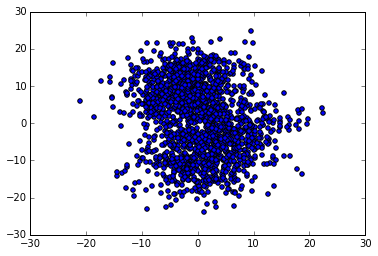

In [224]:
plt.scatter(X[:, 0], X[:, 1]);

1 -85830.0943779 44.040947453
2 -79267.9264715 112.496241173
3 -77588.9837858 111.654825494
4 -75896.9559892 59.1118075552
5 -74823.9692635 995.689350362
6 -74854.7959874 456.392334881
7 -75299.6157818 487.202210032
8 -75702.690181 403.087925554
9 -76346.5812445 381.44715105
10 -76927.3846589 544.482409156


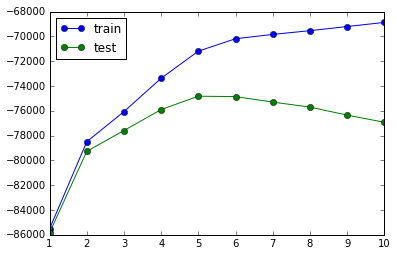

In [247]:
n_components = np.arange(1, 11)
test_logliks = []
train_logliks = []
for i in n_components:
#     gmm = VBGMM(n_components=i, covariance_type='full', alpha=1., random_state=0)
    gmm = GMM(n_components=i, covariance_type='full', min_covar=1e-3, random_state=0)
    test_loglik_folds = []
    train_loglik_folds = []
    for j in range(3):
        X_train, X_test = train_test_split(X, test_size=0.5, random_state=j)
        gmm.fit(X_train)
        test_loglik_folds.append(gmm.score(X_test).sum())
        train_loglik_folds.append(gmm.score(X_train).sum())
    test_loglik = np.mean(test_loglik_folds)
    print(i, test_loglik, np.std(test_loglik_folds))
    test_logliks.append(test_loglik)
    train_logliks.append(np.mean(train_loglik_folds))


plt.plot(n_components, train_logliks, 'o-', label='train')
plt.plot(n_components, test_logliks, 'o-', label='test')
plt.legend(loc='best');